# Practice Lab: Buenos Aires subway - Data structures

As a data analyst, you are examining public transportation accessibility in Buenos Aires, Argentina, for an upcoming project. You are particularly interested in the subway system as an efficient way to navigate the city. You will first focus on the Pueyrredon station on Line D of the subway and examine its ridership.

<div style="text-align: center;">
    <img src="imgsL1/subway_map_wcircle.jpg" alt="Subway map" width="800"/>
</div>

<div style="text-align: center;">
    <a href="https://emova.com.ar/wp-content/uploads/2023/09/Mapa_Emova_2023-color-.jpg">image source</a>
</div>


## General instructions
- **Replace any instances of `None` with your own code**. All `None`s must be replaced.
- **Compare your results with the expected output** shown below the code.
- **Check the solution** using the expandable cell to verify your answer.

Happy coding!

<div style="background-color: #FAD888; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
<strong>Important note</strong>: Code blocks with None will not run properly. If you run them before completing the exercise, you will likely get an error. 
</div>

## Table of Contents

- [Step 1: Load the data](#step-1)
- [Step 2: Migrating from lists to a DataFrame](#step-2)
- [Step 3: Select columns](#step-3)
- [Step 4: Calculate the sum per column](#step-4)


<a id="step-1"></a>
## Step 1: Load the data

First, you will import `pandas` and load the dataset as a pandas DataFrame. The CSV will have these features:

* `datetime` - hour and date the measurement was taken
* `line` - subway line
* `station`	- station name
* `pax_pagos` - paying passengers
* `pax_pases_pagos` - passengers who paid with passes
* `pax_franq` - passengers who paid with deductibles
* `pax_total` - total number of passengers who used the turnstile

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the cell below to import the pandas module. Assign it the alias: <code>pd</code>.</li>
            <li>Load the CSV dataset to a variable <code>df</code>. The filename is <i>pueyrredon_march2024_8-11.csv</i></li>
            <li>Print the first 5 rows.</li>
        </ol>
</div>



In [5]:
### START CODE HERE ###

# Import pandas here.
import pandas as pd

# Load the CSV to a DataFrame and save it in a variable called df.
df = pd.read_csv("pueyrredon_march2024_8-11.csv")

# Preview the first 5 rows.
df.head()

### END CODE HERE ###

,datetime,station,line,pax_pagos,pax_pases_pagos,pax_franq,pax_TOTAL
0,2024-03-01 08:00:00,Pueyrredon.D,D,0,0,6,6
1,2024-03-01 09:00:00,Pueyrredon.D,D,0,0,5,5
2,2024-03-01 10:00:00,Pueyrredon.D,D,0,0,2,2
3,2024-03-01 11:00:00,Pueyrredon.D,D,0,0,3,3
4,2024-03-02 08:00:00,Pueyrredon.D,D,0,0,1,1


<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<br>
<img src="imgsL1/output_step1.png" width="700">
</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# Import pandas here.
import pandas as pd

# Load the CSV to a DataFrame and save it in a variable called df.
df = pd.read_csv("pueyrredon_march2024_8-11.csv")

# Preview the first 5 rows.
df.head()
```
</details>

You can also use the `sample()` method to get some random data points to inspect.

In [ ]:
# Get 10 random samples
df.sample(10)

<a id="step-2"></a>
## Step 2: Inspect the dataset

Next, you will inspect characteristics of the DataFrame to understand the data.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Get the columns from the dataset using the <code>columns</code> attribute and assign it to the <code>df_columns</code> variable.</li>
            <li>Get the data types using the <code>dtypes</code> attribute and assign it to the <code>df_dtypes</code> variable.</i></li>
            <li>Print the first 5 rows.</li>
        </ol>
</div>

In [8]:
### START CODE HERE ###

# Get the columns
df_columns = df.columns

# Get the datatypes
df_dtypes = df.dtypes

### END CODE HERE ###

print("The columns of the dataset are:", list(df_columns))
print("\nThe data types of each column are:\n")
print(df_dtypes)

The columns of the dataset are: ['datetime', 'station', 'line', 'pax_pagos', 'pax_pases_pagos', 'pax_franq', 'pax_TOTAL']

The data types of each column are:

datetime           object
station            object
line               object
pax_pagos           int64
pax_pases_pagos     int64
pax_franq           int64
pax_TOTAL           int64
dtype: object


<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<br>

```text

The columns of the dataset are: ['datetime', 'station', 'line', 'pax_pagos', 'pax_pases_pagos', 'pax_franq', 'pax_TOTAL']

The data types of each column are:
datetime           object
station            object
line               object
pax_pagos           int64
pax_pases_pagos     int64
pax_franq           int64
pax_TOTAL           int64
dtype: object

```

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# Get the columns
df_columns = df.columns

# Get the datatypes
df_dtypes = df.dtypes
```
</details>

Another way to extract these information is to use the `.info()` method. This also provides a `Non-Null Count` column that detects if there are any null values in the dataset.

In [9]:
# Print a summary of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   datetime         116 non-null    object
 1   station          116 non-null    object
 2   line             116 non-null    object
 3   pax_pagos        116 non-null    int64 
 4   pax_pases_pagos  116 non-null    int64 
 5   pax_franq        116 non-null    int64 
 6   pax_TOTAL        116 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 6.5+ KB


<a id="step-3"></a>
## Step 3: Select columns

In real world data, you might receive a lot of features that you don't really need in your analysis. You might be interested in only a handful of features. You can select these specific columns in DataFrames to simplify your dataset. For example, in this use case, you don't find the `station` and `line` columns to be useful because they're the same for every row.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Define a <code>columns</code> variable containing the list of features in <code>df</code> except <code>station</code> and <code>line</code>. You can use the output of <code>df_columns</code> earlier then just remove the two features mentioned.</li>
            <li>Select these columns from the <code>df</code> dataframe and assign it to the variable <code>df_pax</code>.</i></li>
            <li>Print the first 5 rows of this new dataframe.</li>
        </ol>
</div>

In [17]:
### START CODE HERE ###

# Get the list of features without `station` and `line`.
columns = ["datetime", "pax_pagos", "pax_pases_pagos", "pax_franq","pax_TOTAL" ]

# Select the columns in the list above.
df_pax = df[columns]

# Preview the simplified DataFrame.
df_pax.head()

### END CODE HERE ###

,datetime,pax_pagos,pax_pases_pagos,pax_franq,pax_TOTAL
0,2024-03-01 08:00:00,0,0,6,6
1,2024-03-01 09:00:00,0,0,5,5
2,2024-03-01 10:00:00,0,0,2,2
3,2024-03-01 11:00:00,0,0,3,3
4,2024-03-02 08:00:00,0,0,1,1


<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<br>
<img src="imgsL1/output_step3.png" width="580">
</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# Get the list of features without `station` and `line`.
columns = ["datetime", "pax_pagos", "pax_pases_pagos", "pax_franq", "pax_TOTAL"]

# Select the columns in the list above.
df_pax = df[columns]

# Preview the simplified DataFrame.
df_pax.head()
```
</details>

<a id="step-4"></a>
## Step 4: Calculate the sum per column

You want to calculate how much each type of passenger payment contributes to the total passenger count. This can help you quantify how much discounted rates affects the total revenue for that particular month.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the <code>sum()</code> method to count the total number of passengers under the <code>pax_pagos</code>, <code>pax_pases_pagos</code>, <code>pax_franq</code> and <code>pax_TOTAL</code> columns.</li>
        </ol>
</div>

In [22]:
### START CODE HERE ###

# Get the sum for `pax_pagos`
df_pax_pagos = df_pax["pax_pagos"].sum()

# Get the sum for `pax_pases_pagos`
df_pax_pases_pagos = df_pax["pax_pases_pagos"].sum()

# Get the sum for `pax_franq`
df_pax_franq = df_pax["pax_franq"].sum()

# Get the sum for `pax_TOTAL`
df_pax_total = df_pax["pax_TOTAL"].sum()

### END CODE HERE ###

print("Percent of `pax_pagos`:", (df_pax_pagos/df_pax_total*100))
print("Percent of `pax_pases_pagos`:", (df_pax_pases_pagos/df_pax_total*100))
print("Percent of `pax_franq`:", (df_pax_franq/df_pax_total*100))

Percent of `pax_pagos`: 93.89642215324294
Percent of `pax_pases_pagos`: 0.04247671949027937
Percent of `pax_franq`: 6.061101127266786


<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<br>

```text
Percent of `pax_pagos`: 93.89642215324294
Percent of `pax_pases_pagos`: 0.04247671949027937
Percent of `pax_franq`: 6.061101127266786

```

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# Get the sum for "pax_pagos"
df_pax_pagos = df_pax["pax_pagos"].sum()

# Get the sum for "pax_pases_pagos"
df_pax_pases_pagos = df_pax["pax_pases_pagos"].sum()

# Get the sum for "pax_franq"
df_pax_franq = df_pax["pax_franq"].sum()

# Get the sum for "pax_TOTAL"
df_pax_total = df_pax["pax_TOTAL"].sum()
```
</details>

You can also get some preliminary visualization of the data. Say you want to visually inspect what is the typical total passenger count at these hours. You can use the `.hist()` method to do just that.

<Axes: >

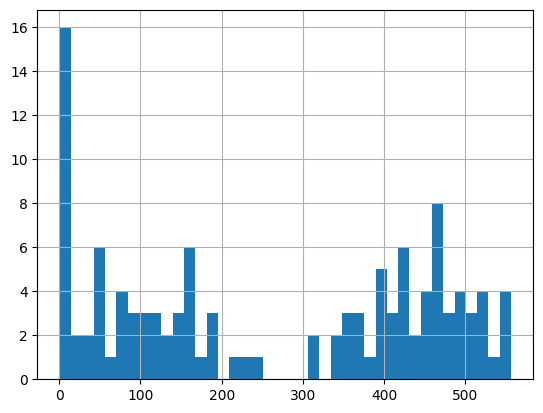

In [23]:
# Generate a histogram of `pax_TOTAL`.
df_pax["pax_TOTAL"].hist(bins=40)

You can see that there seems to be two clusters here divided along the 250 passenger mark. You can get a sense of how free or crowded the station can become at these hours by looking at the taller columns in the chart.

**You've reached the end of the lab! In the next lesson, you will know more about how to sort and filter DataFrames to get more insights. You will also get to use a more complex dataset in the next practice labs. See you there!**